<a href="https://colab.research.google.com/github/michaelcolenso/notebooks/blob/main/examples/Analyze_a_Video_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2024 Google LLC.

In [24]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Analyze a Video - Classification

This notebook uses multimodal capabilities of the Gemini model to classify the species of animals shown in a video.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Analyze_a_Video_Classification.ipynb"><img src = "../images/colab_logo_32px.png"/>Run in Google Colab</a>
  </td>
</table>

In [39]:
!pip install -U -q "google-generativeai"

In [40]:
import time
import google.generativeai as genai

In [41]:
# This is only needed to see the first frame of the video for demonstration purposes
import cv2
import matplotlib.pyplot as plt

## Configure your API key

To run the following cell, your API key must be stored in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication.ipynb) for an example.

In [42]:
from google.colab import userdata
api_key = userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=api_key)

## Example

This example uses a [video](https://commons.wikimedia.org/wiki/File:American_black_bears_(Ursus_americanus).webm) published by Bryon Evans containing an American black bear.

The video falls under the [Creative Commons Attribution 3.0 Unported license](https://creativecommons.org/licenses/by/3.0/deed.en).

In [52]:
path = "/content/sample_data/IMG_5766.MOV"

In [53]:
# Upload video
video_file = genai.upload_file(path=path)

In [54]:
# Wait until the uploaded video is available
while video_file.state.name == "PROCESSING":
  print('.', end='')
  time.sleep(5)
  video_file = genai.get_file(video_file.name)

if video_file.state.name == "FAILED":
  raise ValueError(video_file.state.name)

.

To demonstrate the video content, display the first frame:

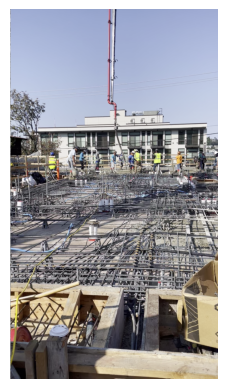

In [55]:
cap = cv2.VideoCapture(path)
_, frame = cap.read()

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.imshow(frame_rgb)
plt.axis('off')
plt.show()

# close video file
cap.release()

The uploaded video is ready to be analyzed. The constructed prompt instructs the model to classify animals in the video. In addition to providing both their English and Latin names.

In [67]:
system_prompt = """
You are a construction project manager. expert at all manner of construction administration, reporting, budgeting, scheduling, and document controls.
"""

In [68]:
model=genai.GenerativeModel(
  model_name="gemini-1.5-pro-002",
  system_instruction=system_prompt)

result = model.generate_content([video_file, "create a daily report based on the video."])
print(f"{result}")



response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "Okay, here's a sample daily report based on the provided video:\n\n**Project:** [Project Name]\n**Date:** October 26, 2023 _(Date estimated from foliage and worker attire)_\n**Report Number:** [Report Number]\n\n**Weather Conditions:** Sunny, clear skies.  _(Observed in the video)_\n\n**Manpower:** Approximately 15-20 workers on site. _(Estimated from video)_  Specific trades observed include:\n* Reinforcing steel installers/tiers\n* Concrete finishers (preparing for the pour)\n* Concrete pump operator\n\n\n**Work Performed:**\n* Installation of reinforcing steel (rebar) for a concrete slab.  Grid pattern appears complete; workers are making final adjustments and securing intersections.\n* Preparation for concrete pour.  Workers are staging equipment, includ

As you can see, the model accurately named the animal and provided a correct Latin name. You can delete the video to prevent unnecessary data storage.

In [69]:
# Delete video
genai.delete_file(video_file.name)

## Summary

Now you know how you can prompt Gemini models with videos and use them to classify species of animals.

This notebook shows only one of many use cases. Try thinking of more yourself or see other notebooks utilizing Gemini API with videos.